#CAPSTONE 2 - Exploratory Data Analysis
# Title = Alzheimer's Disease Prediction 🧠🔍📈

Group 1 - Syahmi ⭐, Beatrice, Farriz

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
pd.set_option('display.max_columns', None)
%matplotlib inline


import warnings
warnings.filterwarnings("ignore")

sns.set_theme(context='notebook', palette='deep', style='darkgrid')

In [30]:
df = pd.read_csv('alzheimers_disease_data.csv')
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [31]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientID,2149.0,5825.000000,620.507185,4751.000000,5288.000000,5825.000000,6362.000000,6899.000000
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
Gender,2149.0,0.506282,0.500077,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2149.0,0.697534,0.996128,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2149.0,1.286645,0.904527,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
Smoking,2149.0,0.288506,0.453173,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346


In [33]:
# from google.colab import drive
# drive.mount('/content/drive')

In [34]:
sum(df.duplicated())

0

In [35]:
df.DoctorInCharge.value_counts()

DoctorInCharge
XXXConfid    2149
Name: count, dtype: int64

In [36]:
df.drop(['PatientID', 'DoctorInCharge'], axis=1, inplace=True)


In [37]:
df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0


#Initial Data Exploration Summary

The dataset contains a total of 2,149 observations.

All values in the dataset are non-null and numerical.

There are no duplicate records.

After removing the `DoctorInCharge` and `PatientID` columns, the dataset consists of 33 features

In [38]:
# Identify numerical columns: columns with more than 10 unique values are considered numerical
numerical_columns = [col for col in df.columns if df[col].nunique() > 10]

# Identify categorical columns: columns that are not numerical and not 'Diagnosis'
categorical_columns = df.columns.difference(numerical_columns).difference(['Diagnosis']).to_list()

In [39]:
# Custom labels for the categorical columns
custom_labels = {
    'Gender': ['Male', 'Female'],
    'Ethnicity': ['Malay', 'Indian', 'Chinese', 'Other'],
    'EducationLevel': ['None', 'High School', 'Bachelor\'s', 'Higher'],
    'Smoking': ['No', 'Yes'],
    'FamilyHistoryAlzheimers': ['No', 'Yes'],
    'CardiovascularDisease': ['No', 'Yes'],
    'Diabetes': ['No', 'Yes'],
    'Depression': ['No', 'Yes'],
    'HeadInjury': ['No', 'Yes'],
    'Hypertension': ['No', 'Yes'],
    'MemoryComplaints': ['No', 'Yes'],
    'BehavioralProblems': ['No', 'Yes'],
    'Confusion': ['No', 'Yes'],
    'Disorientation': ['No', 'Yes'],
    'PersonalityChanges': ['No', 'Yes'],
    'DifficultyCompletingTasks': ['No', 'Yes'],
    'Forgetfulness': ['No', 'Yes']
}

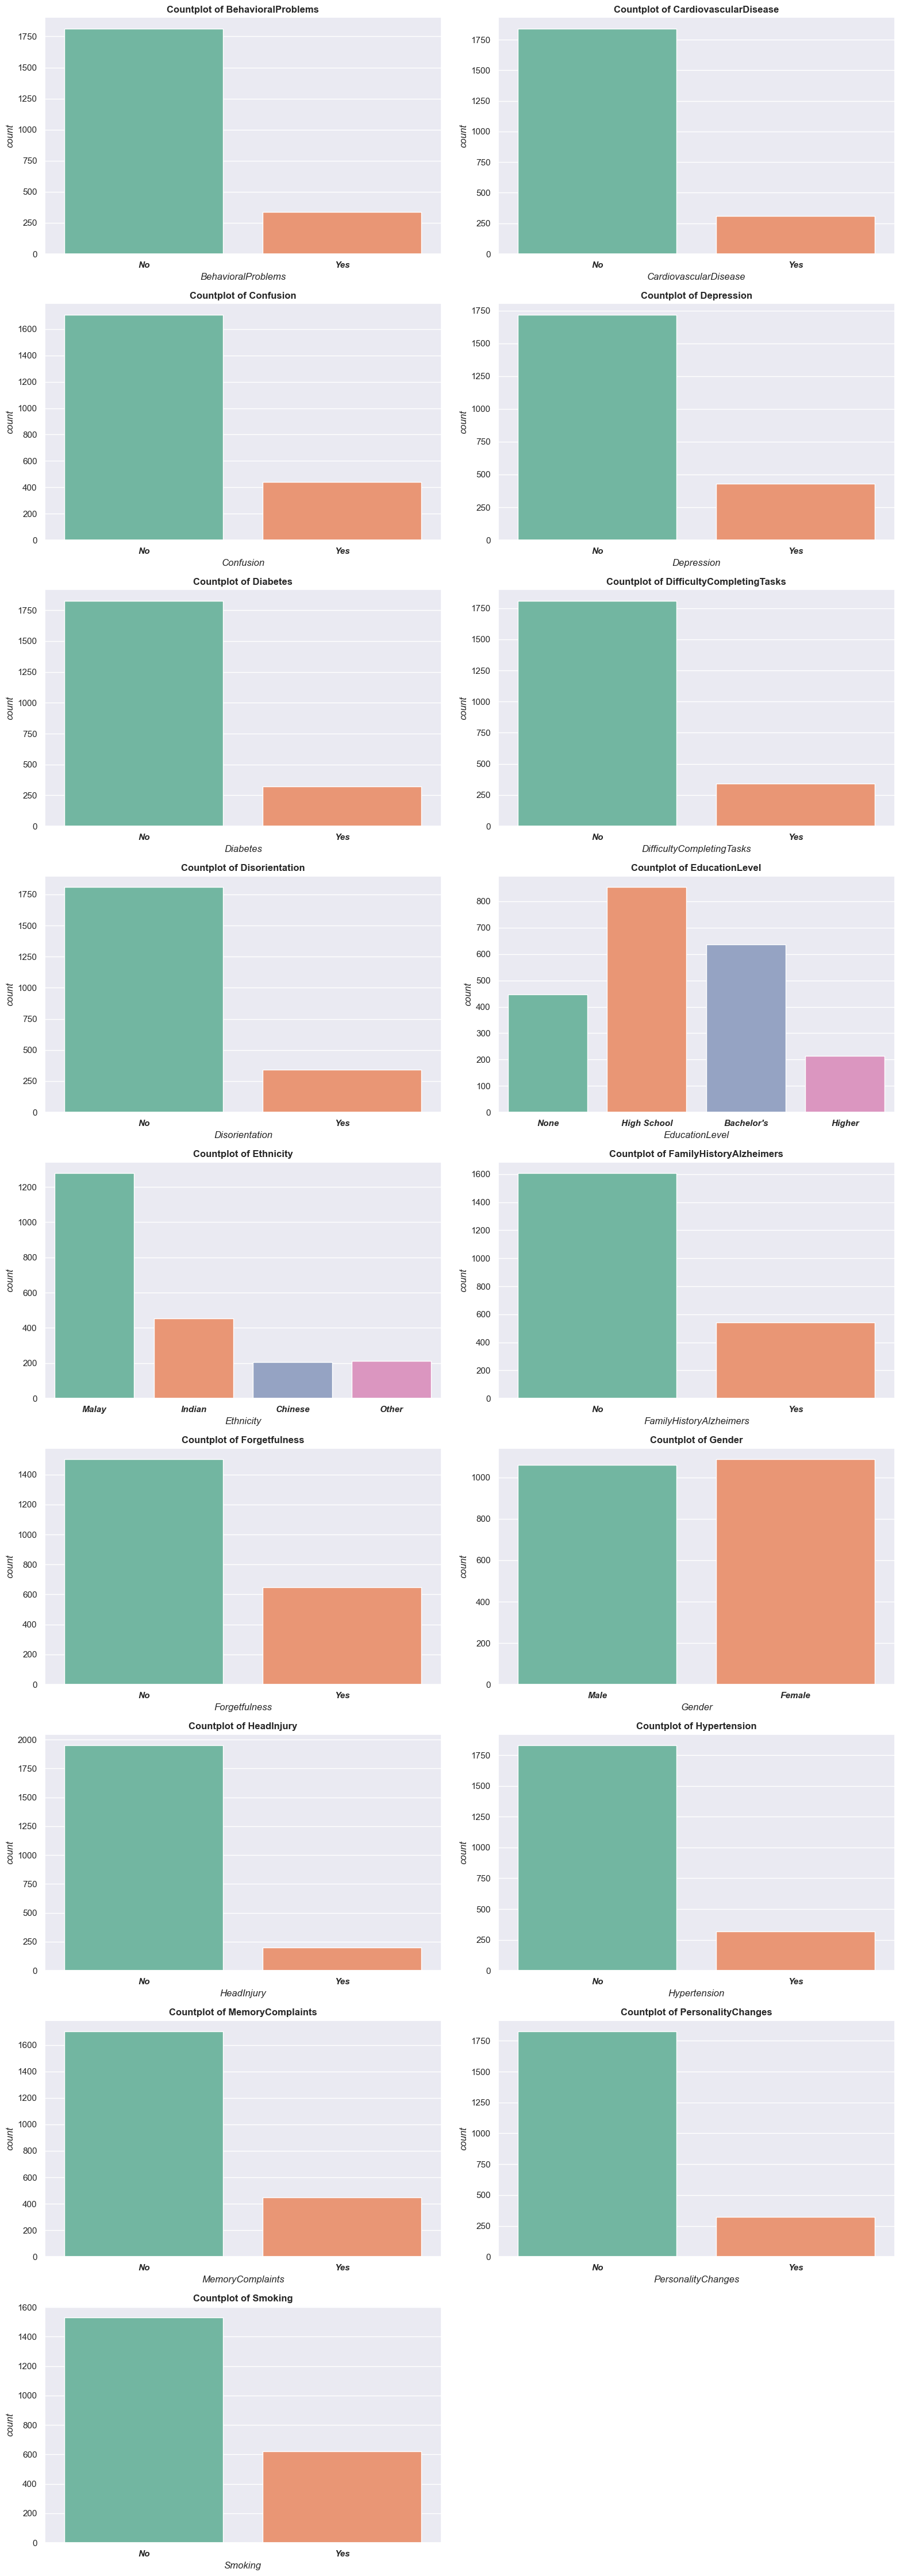

In [40]:
# Define the custom palette
custom_palette = sns.color_palette("Set2")

# Number of columns to plot side by side
n_cols = 2
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, column in enumerate(categorical_columns):
    sns.countplot(data=df, x=column, palette=custom_palette, ax=axes[i])
    axes[i].set_title(f'Countplot of {column}', fontweight='bold')

    # Set custom labels
    labels = custom_labels[column]
    ticks = range(len(labels))
    axes[i].set_xticks(ticks)
    axes[i].set_xticklabels(labels, fontstyle='italic', fontweight='bold')

    # Set axis labels to italic
    axes[i].set_xlabel(axes[i].get_xlabel(), fontstyle='italic')
    axes[i].set_ylabel(axes[i].get_ylabel(), fontstyle='italic')

# Remove empty subplots if the number of categorical columns is not even
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust space between plots
plt.subplots_adjust(wspace=20, hspace=30)

plt.tight_layout()
plt.show()

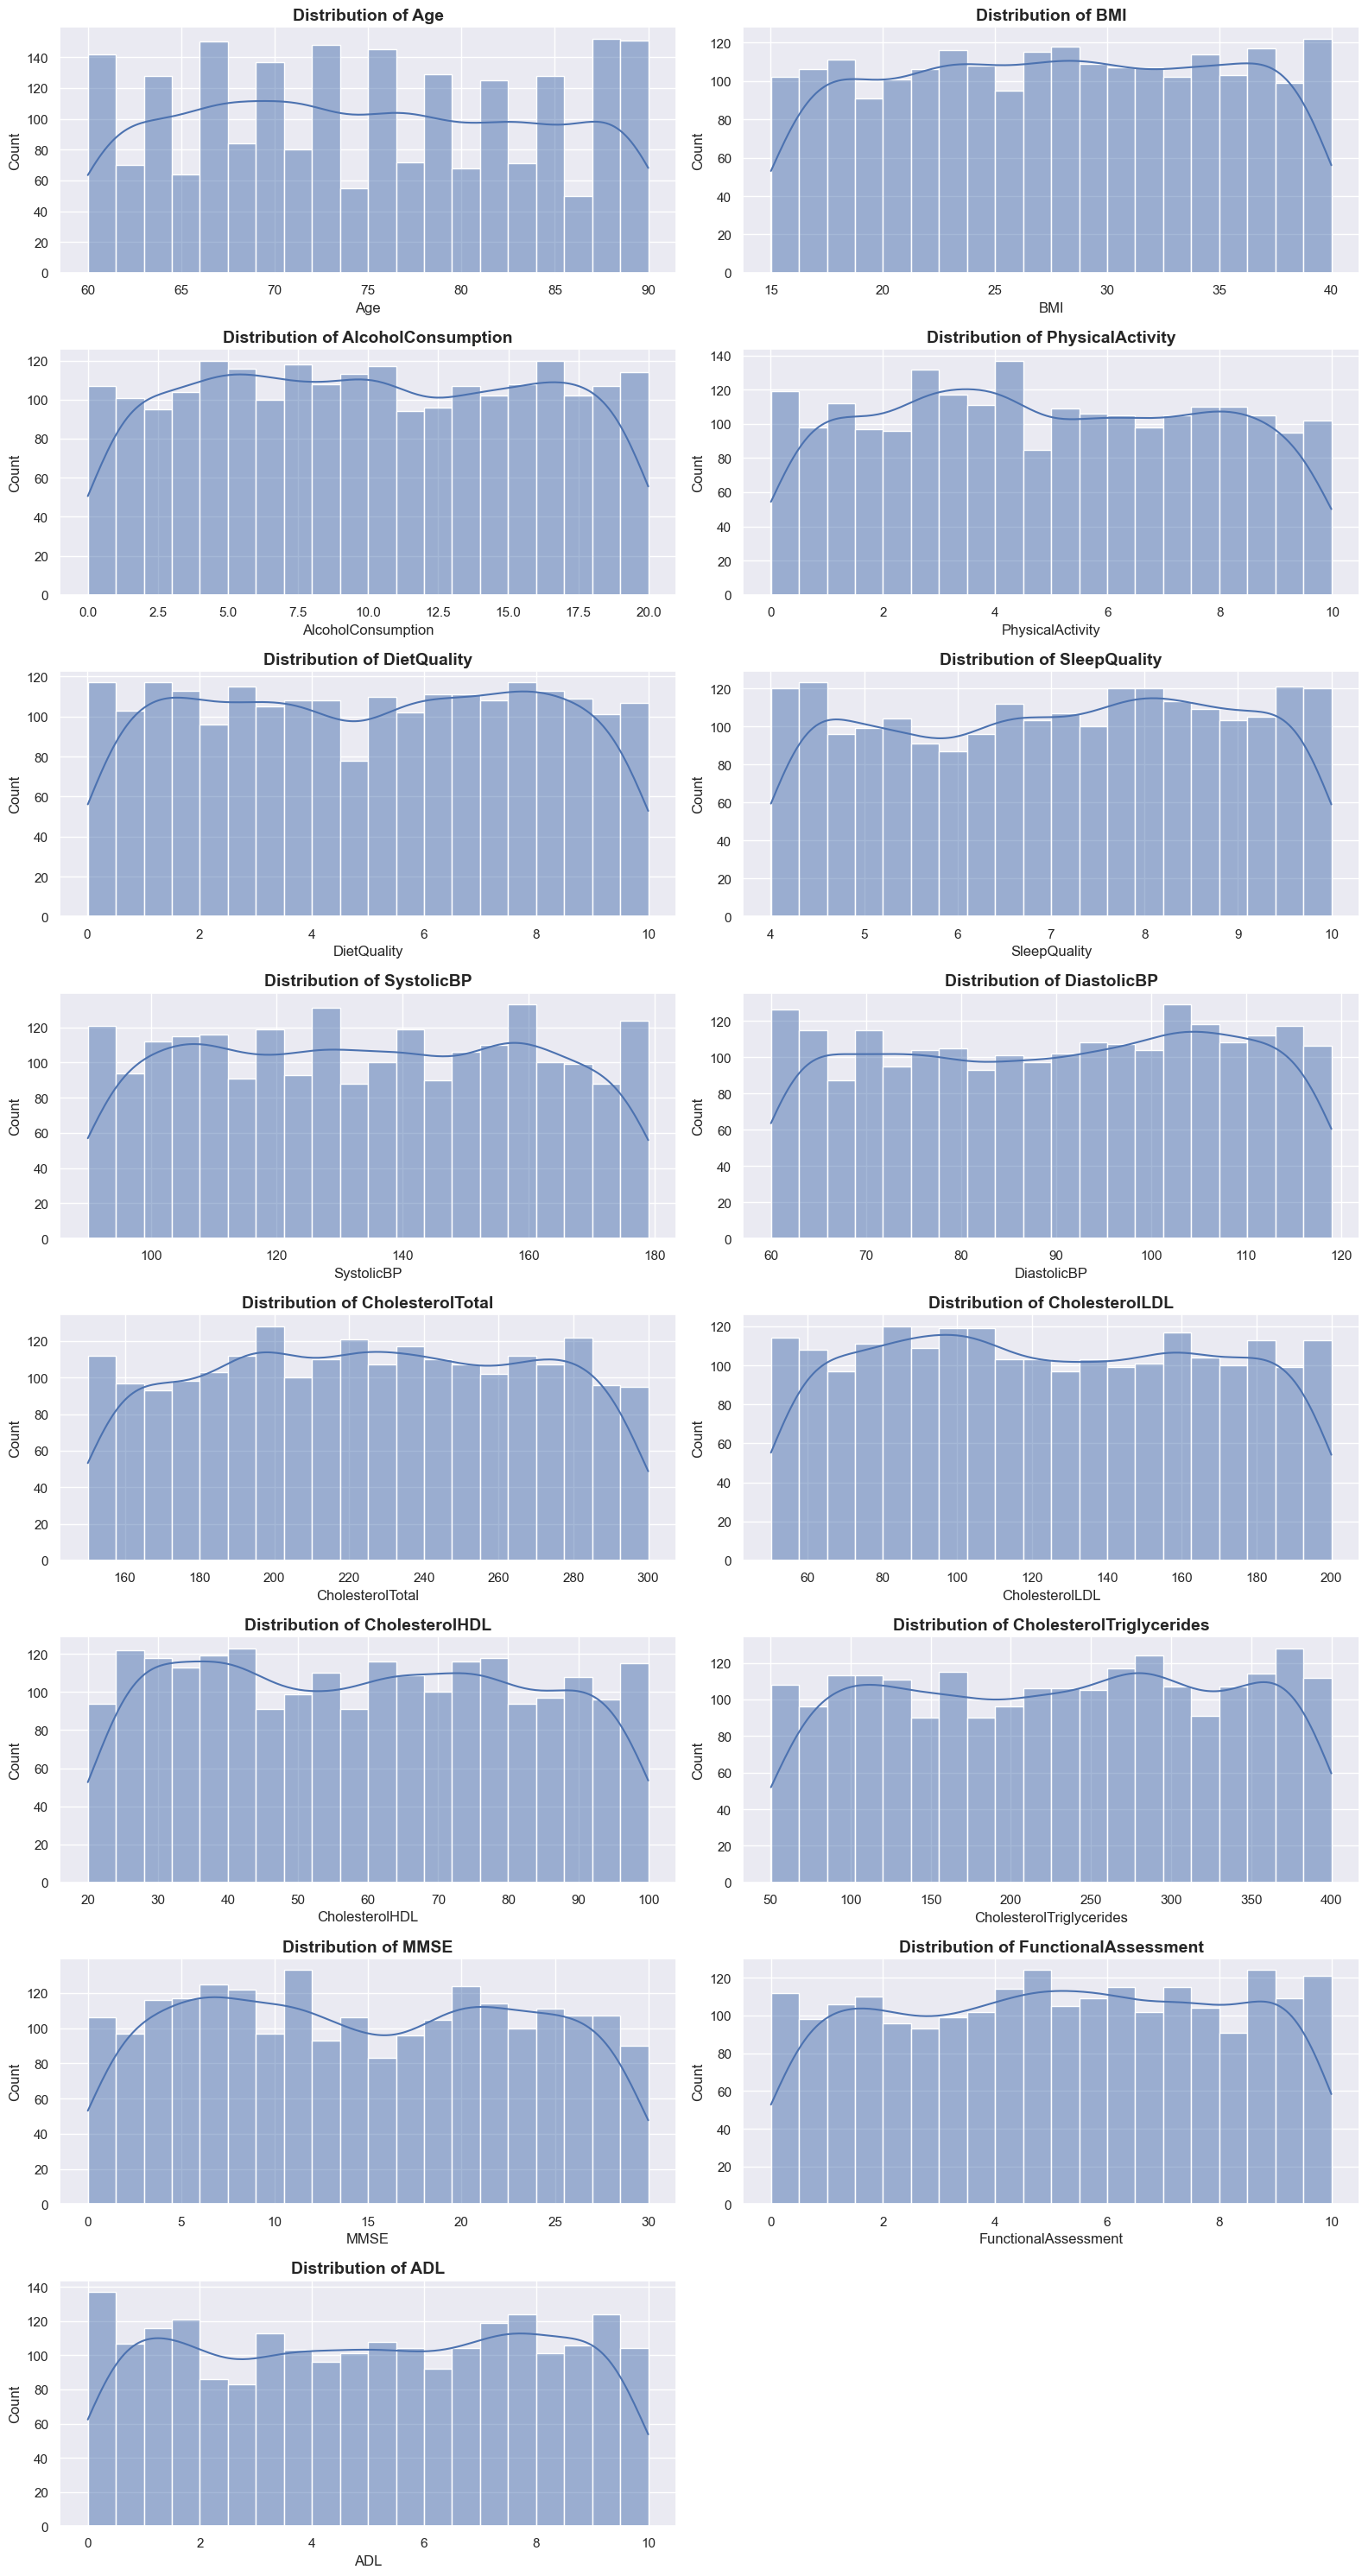

In [41]:
n_cols = 2
n_rows = -(-len(numerical_columns) // n_cols)  # Ceiling division to get the number of rows

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 30))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each numerical column
for idx, column in enumerate(numerical_columns):
    sns.histplot(data=df, x=column, kde=True, bins=20, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {column}', fontsize=14, fontweight='bold')

# Remove any empty subplots
for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

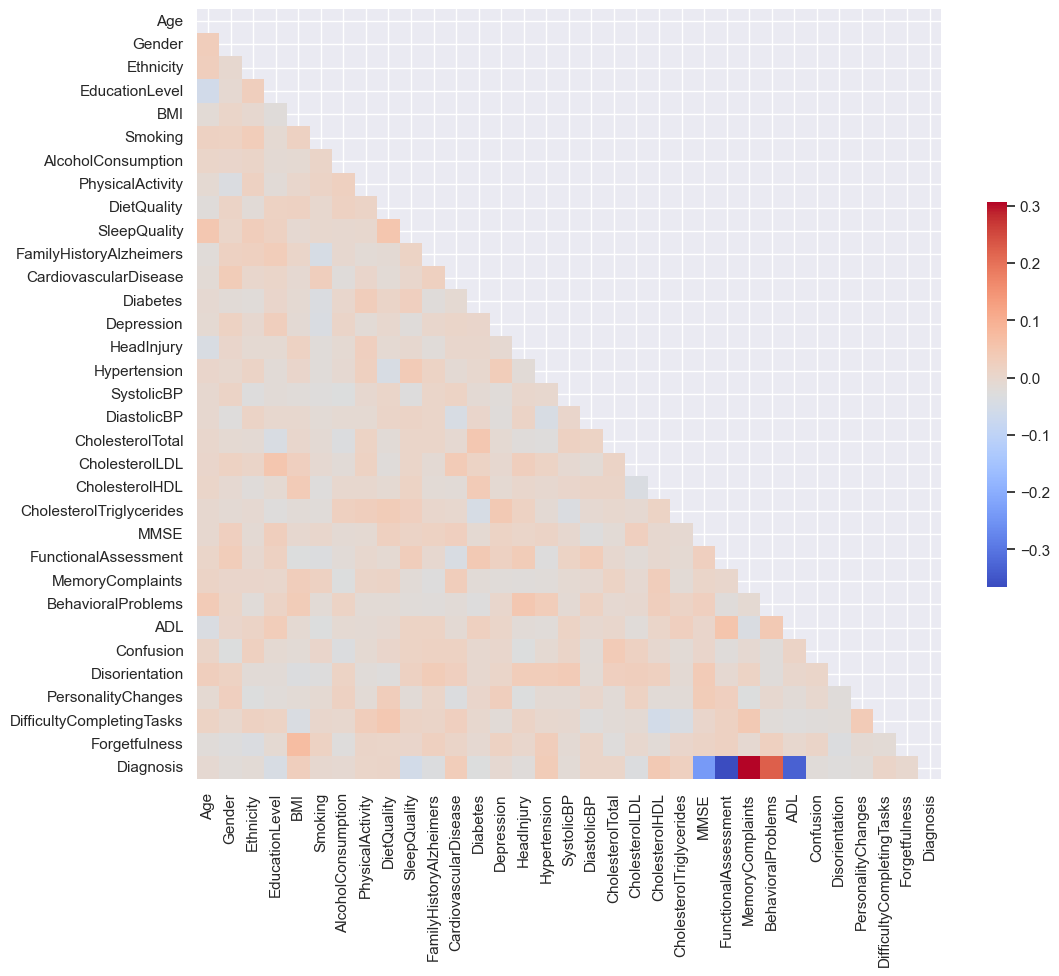

In [42]:
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(),cmap="coolwarm", cbar_kws={"shrink": .5}, mask=mask)

plt.show()

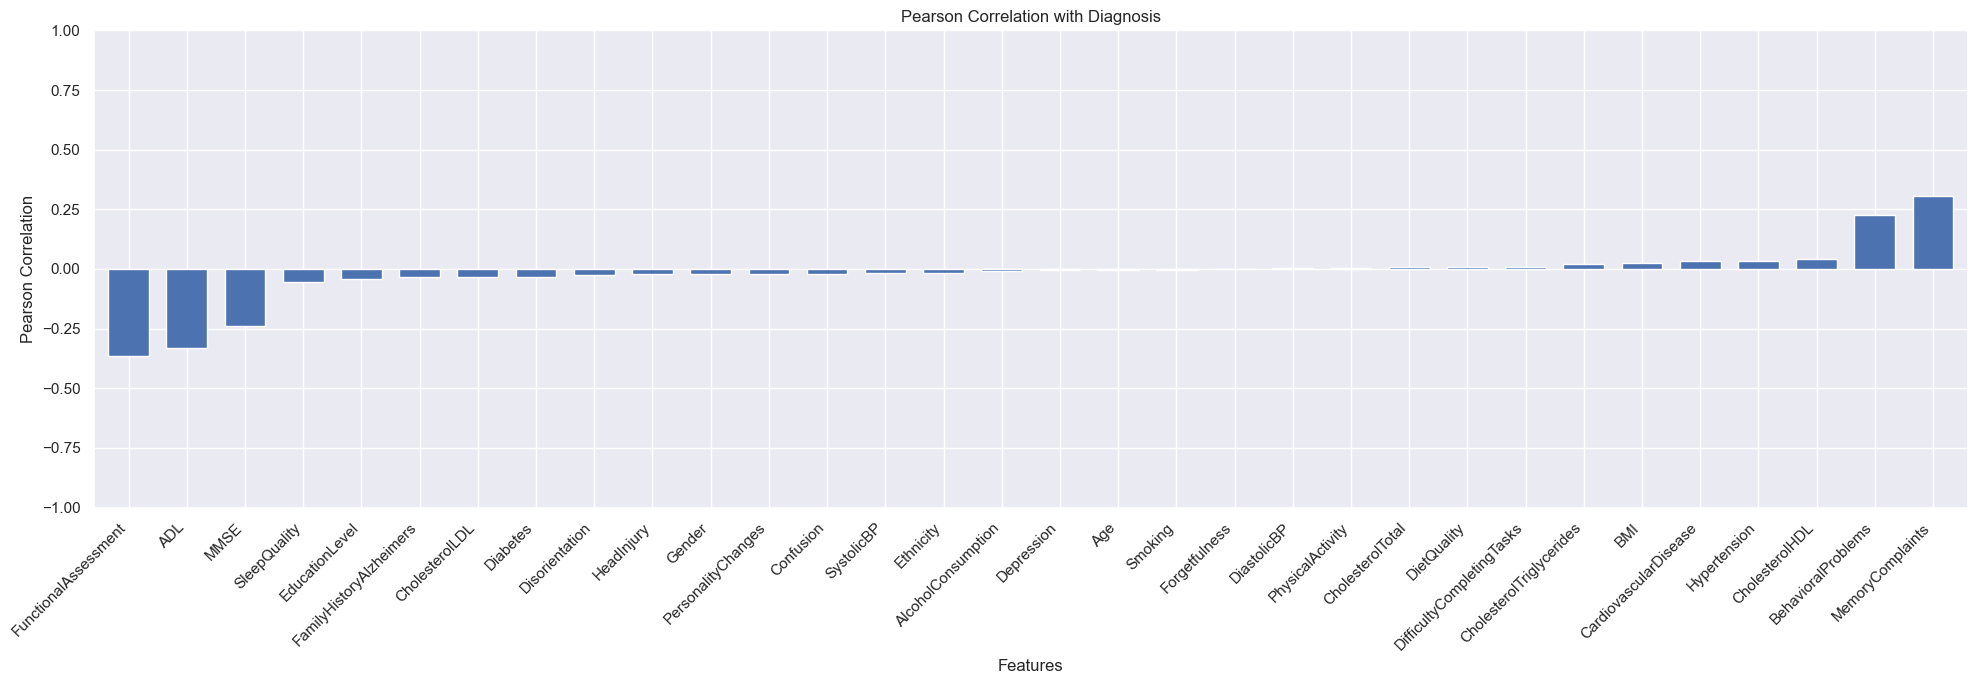

In [43]:
# Compute Pearson correlation coefficients
correlations = df.corr(numeric_only=True)['Diagnosis'][:-1].sort_values()

# Set the size of the figure
plt.figure(figsize=(20, 7))

# Create a bar plot of the Pearson correlation coefficients
ax = correlations.plot(kind='bar', width=0.7)

# Set the y-axis limits and labels
ax.set(ylim=[-1, 1], ylabel='Pearson Correlation', xlabel='Features',
       title='Pearson Correlation with Diagnosis')

# Rotate x-axis labels for better readability
ax.set_xticklabels(correlations.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

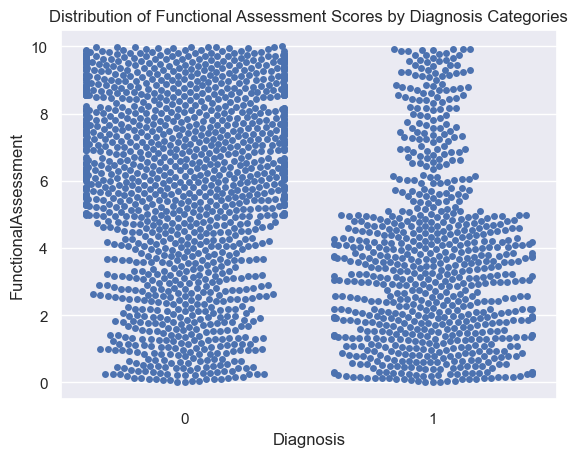

In [44]:
sns.swarmplot(data=df, y='FunctionalAssessment', x='Diagnosis')
plt.title(f'Distribution of Functional Assessment Scores by Diagnosis Categories')
plt.show()

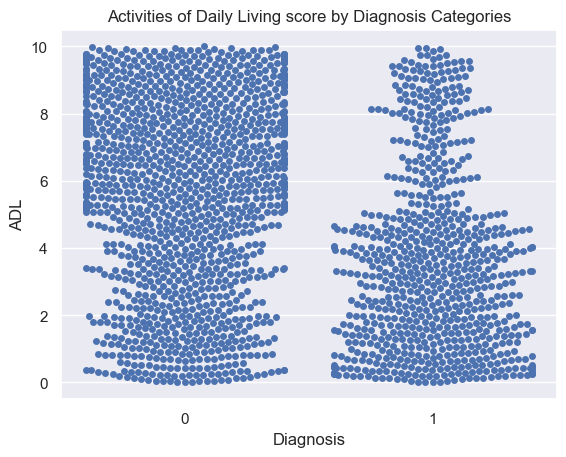

In [45]:
sns.swarmplot(data=df, y='ADL', x='Diagnosis')
plt.title(f'Activities of Daily Living score by Diagnosis Categories')
plt.show()

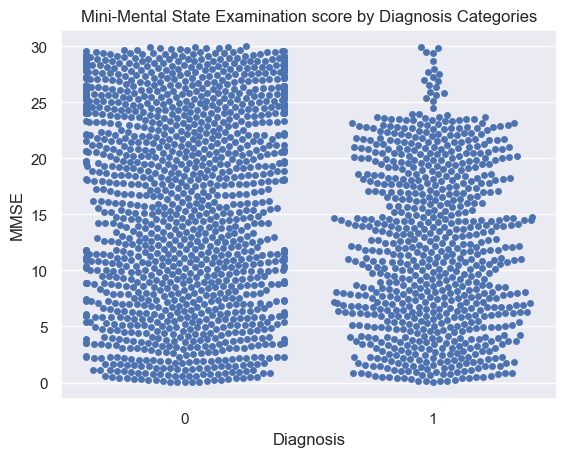

In [46]:
sns.swarmplot(data=df, y='MMSE', x='Diagnosis')
plt.title(f'Mini-Mental State Examination score by Diagnosis Categories')
plt.show()

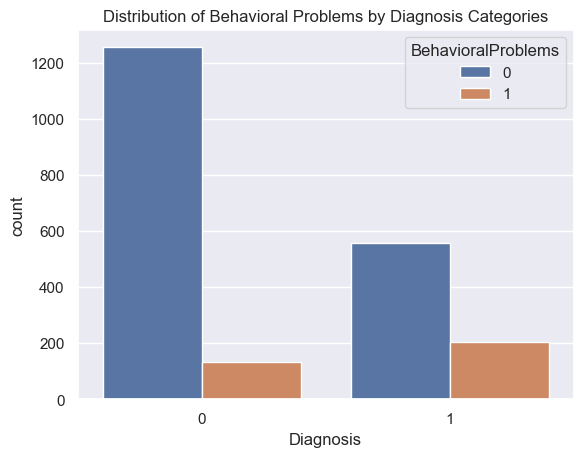

In [47]:
sns.countplot(data=df, x='Diagnosis', hue='BehavioralProblems')
plt.title(f'Distribution of Behavioral Problems by Diagnosis Categories')
plt.show()

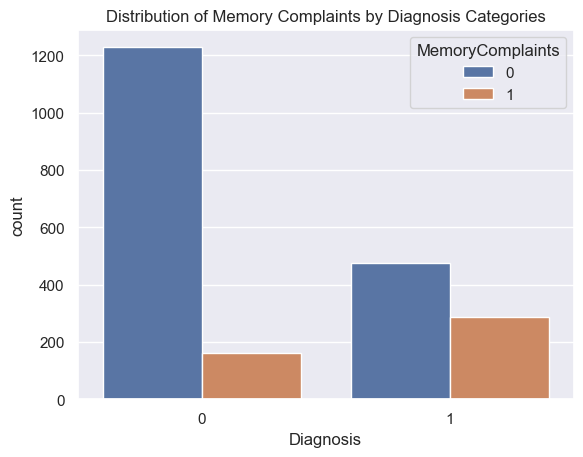

In [48]:
sns.countplot(data=df, x='Diagnosis', hue='MemoryComplaints')
plt.title(f'Distribution of Memory Complaints by Diagnosis Categories')
plt.show()

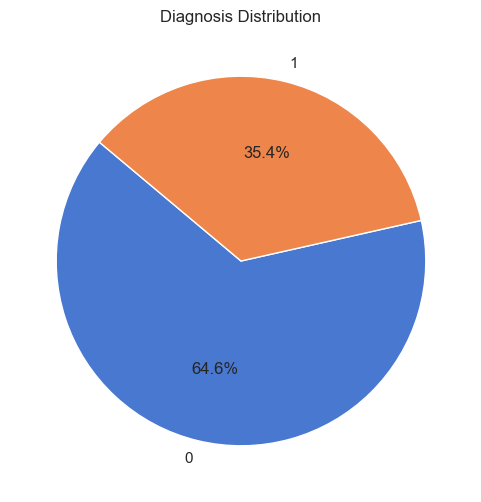

In [49]:
# Define the Response categories and count occurences
categories = [0, 1]
counts = df.Diagnosis.value_counts().tolist()

# Choose a color palette from Seaborn for the pie chart
colors = sns.color_palette("muted")

# Plot the pie chart with the counts of each response category
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Diagnosis Distribution')
plt.show()

#Pre-processing data

In [50]:
df

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,7.535540,0,0,0,0,0,0,122,101,280.476824,94.870490,60.943092,234.520123,1.201190,0.238667,0,0,4.492838,1,0,0,0,0,1
2145,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,8.555256,0,0,0,0,0,0,152,106,186.384436,95.410700,93.649735,367.986877,6.458060,8.687480,0,1,9.204952,0,0,0,0,0,1
2146,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,5.769464,0,0,0,0,0,0,115,118,237.024558,156.267294,99.678209,294.802338,17.011003,1.972137,0,0,5.036334,0,0,0,0,0,1
2147,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,8.322874,0,1,0,0,0,0,103,96,242.197192,52.482961,81.281111,145.253746,4.030491,5.173891,0,0,3.785399,0,0,0,0,1,1


In [51]:
#unique values in each column
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print()

Unique values in column 'Age':
[73 89 74 86 68 75 72 87 78 84 64 69 63 65 82 77 71 83 79 67 66 70 85 60
 88 62 81 61 80 90 76]

Unique values in column 'Gender':
[0 1]

Unique values in column 'Ethnicity':
[0 3 1 2]

Unique values in column 'EducationLevel':
[2 0 1 3]

Unique values in column 'BMI':
[22.92774923 26.82768119 17.79588244 ... 15.47647896 15.29991122
 33.28973831]

Unique values in column 'Smoking':
[0 1]

Unique values in column 'AlcoholConsumption':
[13.29721773  4.54252382 19.55508453 ...  4.59467018  8.67450518
  7.89070315]

Unique values in column 'PhysicalActivity':
[6.32711247 7.61988454 7.84498779 ... 9.88600229 6.35428175 6.57099338]

Unique values in column 'DietQuality':
[1.34721431 0.51876714 1.82633466 ... 8.12002455 1.26342749 7.94140388]

Unique values in column 'SleepQuality':
[9.02567867 7.15129274 9.67357416 ... 5.76946355 8.32287396 9.87871052]

Unique values in column 'FamilyHistoryAlzheimers':
[0 1]

Unique values in column 'CardiovascularDisease':
[0

In [52]:
columns = ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'SystolicBP', 'DiastolicBP',
           'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL']

#normalize the columns
min_max_scaler = MinMaxScaler()
df[columns] = min_max_scaler.fit_transform(df[columns])

#standardize the columns
standard_scaler = StandardScaler()
df[columns] = standard_scaler.fit_transform(df[columns])

In [53]:
df

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,-0.212368,0,0,2,-0.655225,0,0.565923,0.492525,-1.253593,1.119918,0,0,1,1,0,0,0.298159,-1.014750,0.403677,-1.572661,-1.114429,-0.648199,0.779037,0.497506,0,0,-1.104434,0,0,0,1,0,0
1,1.567757,0,0,0,-0.114751,0,-0.954895,0.945093,-1.538442,0.056836,0,0,0,0,0,0,-0.742572,-1.469595,0.140248,1.593119,0.845730,0.650721,0.680297,0.704907,0,0,-0.810601,0,0,0,0,1,0
2,-0.212368,0,3,1,-1.366428,0,1.653006,1.023896,-1.088855,1.487380,1,0,0,0,0,0,-1.359301,1.486898,1.386812,0.668569,0.445615,-1.418585,-0.859222,0.281813,0,0,0.724491,0,1,0,1,0,0
3,-0.101111,1,0,1,0.851625,1,0.376930,1.227995,0.839804,0.760833,0,0,0,0,0,0,-0.626935,1.430043,-1.542715,-1.360103,0.388780,0.483468,-0.088723,1.343346,0,1,0.508044,0,0,0,0,0,0
4,1.567757,0,0,0,-0.961607,0,1.461793,0.486696,-1.443293,-0.824566,0,0,0,0,0,0,-1.552029,1.543754,0.291653,-0.725756,-0.111924,0.617060,-0.143712,0.333665,0,0,-1.684679,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,-1.547463,0,0,1,1.589030,0,-1.472807,-0.304649,0.537127,0.274767,0,0,0,0,0,0,-0.472753,0.634063,1.299701,-0.679609,0.063957,0.061185,-1.574000,-1.674022,0,0,-0.166194,1,0,0,0,0,1
2145,0.010147,0,0,2,-1.357833,0,1.516149,-1.246106,-0.718090,0.853112,0,0,0,0,0,0,0.683615,0.918342,-0.912555,-0.667149,1.477761,1.370158,-0.963527,1.247350,0,1,1.431627,0,0,0,0,0,1
2146,0.232663,0,0,1,-1.687864,0,-0.945836,1.738405,1.075131,-0.726886,0,0,0,0,0,0,-0.742572,1.600609,0.278072,0.736484,1.738352,0.652402,0.261971,-1.074634,0,0,0.018099,0,0,0,0,0,1
2147,0.343921,1,3,1,-1.712334,0,-0.237109,0.502036,-1.282402,0.721313,0,1,0,0,0,0,-1.205119,0.349785,0.399688,-1.657260,0.943104,-0.814293,-1.245437,0.032446,0,0,-0.406078,0,0,0,0,1,1


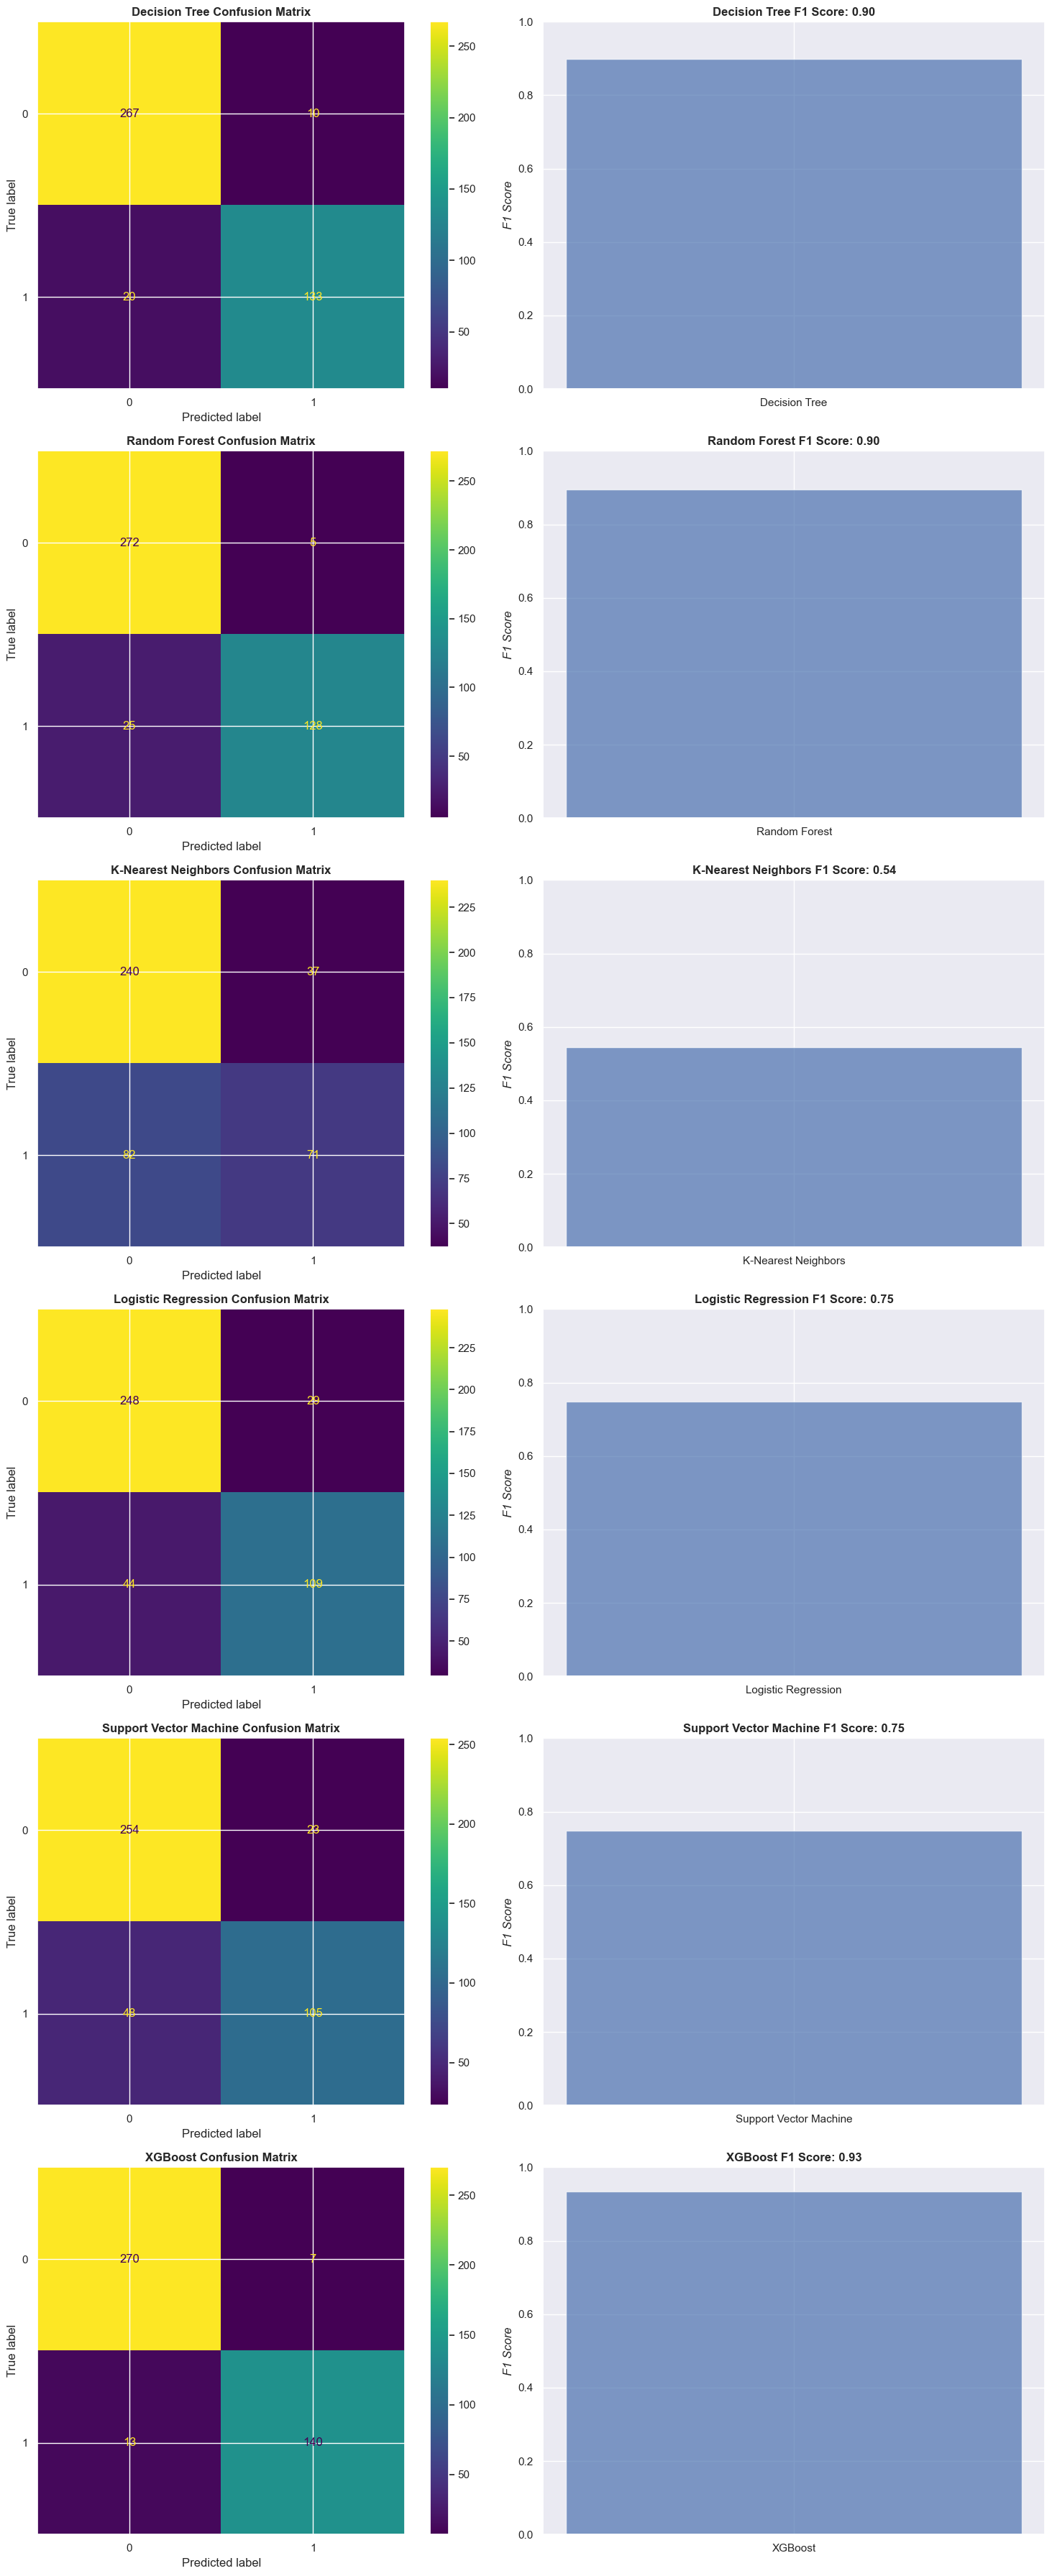

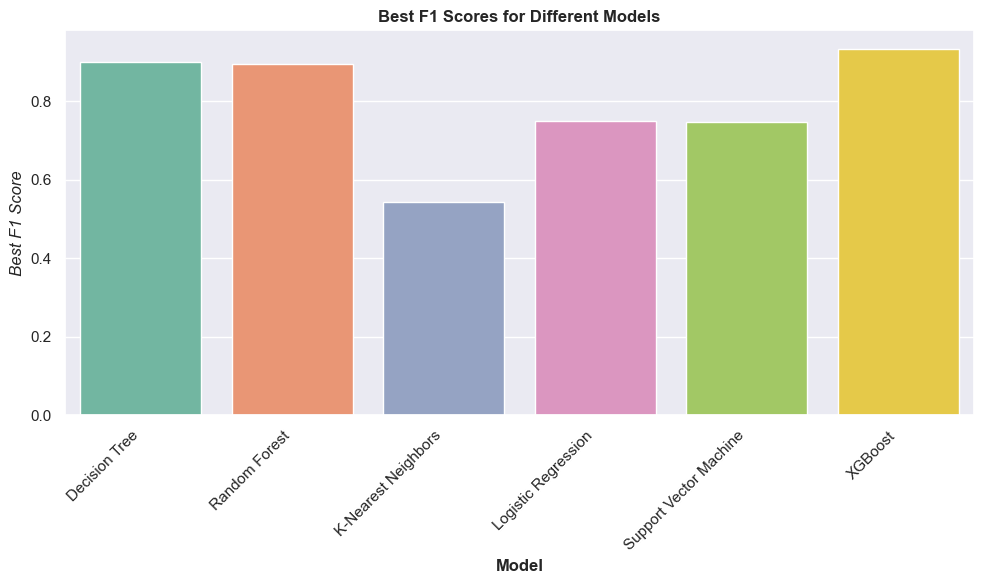

In [56]:
# Split data into features and target
X = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Define hyperparameter grids for each model
param_grids = {
    'Decision Tree': {'max_depth': [3, 5, 7, 12, None]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7, 12, None]},
    'K-Nearest Neighbors': {'n_neighbors': [3, 5, 7]},
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Support Vector Machine': {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 'scale', 'auto']},
    'XGBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1], 'max_depth': [3, 5, 7]}
}

# Instantiate classification models with default parameters
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'XGBoost': XGBClassifier()
}

# Dictionary to store the best F1 scores for each model
best_f1_scores = {}

# Fit models using GridSearchCV for hyperparameter tuning
fig, axes = plt.subplots(len(models), 2, figsize=(15, len(models) * 6))
axes = axes.flatten()

for idx, (name, model) in enumerate(models.items()):
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='f1')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    report = classification_report(y_test, y_pred)
    best_f1 = f1_score(y_test, y_pred)
    best_f1_scores[name] = best_f1

    # Plot confusion matrix
    ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, ax=axes[idx*2])
    axes[idx*2].set_title(f'{name} Confusion Matrix', fontweight='bold')

    # Plot F1 score bar
    axes[idx*2 + 1].bar(name, best_f1, color='b', alpha=0.7)
    axes[idx*2 + 1].set_ylim(0, 1)
    axes[idx*2 + 1].set_title(f'{name} F1 Score: {best_f1:.2f}', fontweight='bold')
    axes[idx*2 + 1].set_ylabel('F1 Score', fontstyle='italic')

plt.tight_layout()
plt.show()

# Convert the best F1 scores to a DataFrame for easy plotting
f1_scores_df = pd.DataFrame(list(best_f1_scores.items()), columns=['Model', 'Best F1 Score'])

# Plot the F1 scores using a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Best F1 Score', data=f1_scores_df, palette='Set2')
plt.title('Best F1 Scores for Different Models', fontweight='bold')
plt.xlabel('Model', fontweight='bold')
plt.ylabel('Best F1 Score', fontstyle='italic')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()